In [1]:
# a quick tutorial for pearson + spearman, using actual data example
# tutorial url:
# https://cmdlinetips.com/2019/08/how-to-compute-pearson-and-spearman-correlation-in-python/

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_url = 'http://bit.ly/2cLzoxH'
# read data from url as pandas dataframe
gapminder = pd.read_csv(data_url)
# let us select two relevant columns
gapminder = gapminder[['gdpPercap', 'lifeExp']]
gapminder.head(2)

,gdpPercap,lifeExp
0,779.445314,28.801
1,820.853030,30.332


Text(0.5, 0, 'lifeExp')

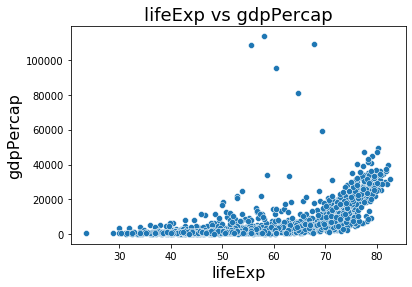

In [5]:
sns.scatterplot(x='lifeExp',y='gdpPercap',data=gapminder)
plt.title('lifeExp vs gdpPercap', fontsize=18)
plt.ylabel('gdpPercap', fontsize=16)
plt.xlabel('lifeExp', fontsize=16)

C:\Users\liamk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

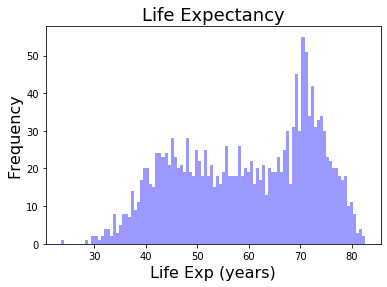

In [6]:
hplot = sns.distplot(gapminder['lifeExp'], kde=False, color='blue', bins=100)
plt.title('Life Expectancy', fontsize=18)
plt.xlabel('Life Exp (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [11]:
stats.pearsonr(gapminder.gdpPercap, gapminder.lifeExp)

(0.5837062198659947, 3.5657242410520643e-156)

## Spearman using Pandas

In [14]:
## We can see that Spearman correlation is higher than Pearson correlation
gapminder.gdpPercap.corr(gapminder.lifeExp, method="spearman")

0.8264711811970715

## Spearman using Numpy

In [15]:
gapminder["gdpPercap_r"] = gapminder.gdpPercap.rank()
gapminder["lifeExp_r"] = gapminder.lifeExp.rank()
gapminder.head()

,gdpPercap,lifeExp,gdpPercap_r,lifeExp_r
0,779.445314,28.801,227.0,2.0
1,820.853030,30.332,255.0,6.0
2,853.100710,31.997,274.0,11.0
3,836.197138,34.020,262.0,25.0
4,739.981106,36.088,202.0,45.0


In [16]:
np.corrcoef(gapminder.gdpPercap_r, gapminder.lifeExp_r)

array([[1.        , 0.82647118],
       [0.82647118, 1.        ]])

## Spearman using Scipy

In [18]:
stats.spearmanr(gapminder.gdpPercap, gapminder.lifeExp)

SpearmanrResult(correlation=0.8264711811970715, pvalue=0.0)